In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/generate_data.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/generate_data
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/generate_data


In [5]:
I= 5 #number of letters in name
N= 7 #number of letters in surname
DoB= 2000.2310 #date of birth
seed=int(DoB*1e4+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

20002817


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


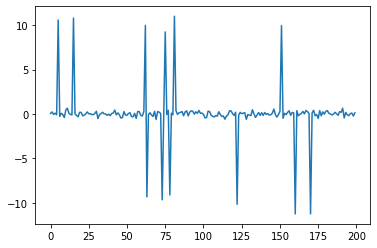

In [7]:
beta_s = generated_data.stan_variable('beta')
plt.plot(generated_data.stan_variable('beta')[0])

In [9]:
model_uniform = CmdStanModel(stan_file = 'model1.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model1.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model1
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model1


In [10]:
data_for_inference = {'N':100,
                      'M':200,
                      'x':generated_data.stan_variable('x')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [11]:
fit_unf = model_uniform.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:06 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:15 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:24 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:33 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:45 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:56 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 01:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 01:14 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 01:23 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |█████▍    | 01:33 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |█████▉    | 01:44 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 01:55 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 02:06 Iteration: 1200 / 2000 [ 


INFO:cmdstanpy:CmdStan done processing.


In [12]:
print(fit_unf.diagnose())

Processing csv files: /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model1-20220403233228_1.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model1-20220403233228_2.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model1-20220403233228_3.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model1-20220403233228_4.csv

Checking sampler transitions treedepth.
3973 of 4000 (99.33%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
27 of 4000 (0.68%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - s

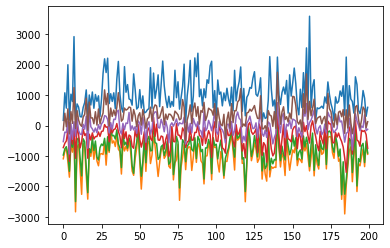

In [13]:
def plots(b):
    max = []
    min = []

    quantiles = {}
    quantiles['q1'] = []
    quantiles['q2'] = []
    quantiles['q3'] = []
    quantiles['q4'] = []
    quantiles['q5'] = []
    for i in range(b.shape[1]):
        b_c = b[:,i] 
        max.append(np.max(b_c))
        min.append(np.min(b_c))

    
        quantiles['q1'].append(np.quantile(b_c, 0.05))
        quantiles['q2'].append(np.quantile(b_c, 0.25))
        quantiles['q3'].append(np.quantile(b_c, 0.5))
        quantiles['q4'].append(np.quantile(b_c, 0.75))
        quantiles['q5'].append(np.quantile(b_c, 0.95))

    plt.plot(max)
    plt.plot(min)


    for i in range(1,len(quantiles.keys())):
        plt.plot(quantiles['q'+str(i)])

    plt.show()

beta = fit_unf.stan_variable('beta')
plots(beta)

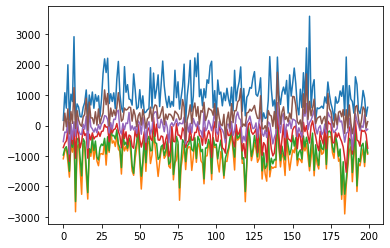

In [14]:
residuals = beta - data_for_inference['x'][:,0]


plots(residuals)

In [15]:
model_reg = CmdStanModel(stan_file = 'model2.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model2.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model2
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model2


In [16]:
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:02 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:03 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:03 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:03 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:04 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:04 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 6


INFO:cmdstanpy:CmdStan done processing.


In [17]:
print(fit_reg.diagnose())

Processing csv files: /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model2-20220403234000_1.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model2-20220403234000_2.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model2-20220403234000_3.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8gvoi1p8/model2-20220403234000_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



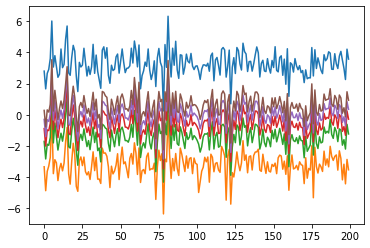

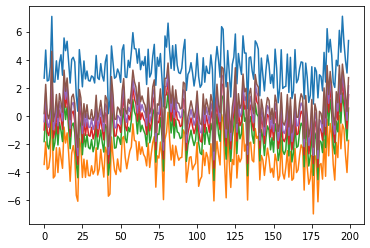

In [18]:
beta = fit_reg.stan_variable('beta')
residuals = beta - data_for_inference['x'][:,0]
plots(beta)
plots(residuals)

In [19]:
model_lap = CmdStanModel(stan_file = 'model3.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model3.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model3
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L04/model3


In [20]:
fit_lap = model_lap.sample(data=data_for_inference,seed=seed,adapt_delta=0.99,max_treedepth=12) #sampling problematic some parameters have to be adjusted

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:07 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:21 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:36 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:46 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:59 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 01:09 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 01:28 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 01:44 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 01:59 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 02:19 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 02:29 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 02:39 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 02:48 Iteration: 1300 / 2000 [ 65%]  (Samp


INFO:cmdstanpy:CmdStan done processing.


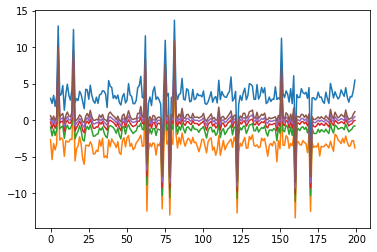

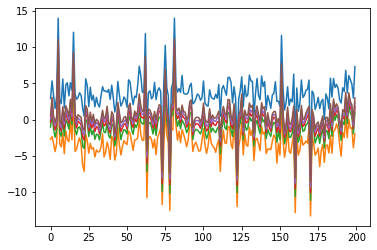

In [21]:
beta = fit_lap.stan_variable('beta')
residuals = beta - data_for_inference['x'][:,0]

plots(beta)
plots(residuals)